# importing Libraries 

In [1]:
import numpy as np      #import numpy for algebra
import pandas as pd     #import pandas to deal with dataframes
import matplotlib.pyplot as plt #import matplot to graphs
from sklearn.cluster import KMeans #import kmeans class to use the model
from sklearn.cluster import AgglomerativeClustering  #import heirarchal class to use the model


# Understanding and Analysis Data Features 

In [2]:
# importing and reading excel sheet 
data = pd.read_excel('Online Retail.xlsx')
#show first 10 rows of data
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
#to know how many rows and columns
data.shape

(541909, 8)

In [4]:
#discover how many NaN values in each feature
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

1- i have 1454 NULL Value in description column 

2- i have 135080 missing id 

In [5]:
#discover type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#getting period that tha study in it
data['InvoiceDate'].unique()

array(['2010-12-01T08:26:00.000000000', '2010-12-01T08:28:00.000000000',
       '2010-12-01T08:34:00.000000000', ...,
       '2011-12-09T12:31:00.000000000', '2011-12-09T12:49:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

conclusion :
    study duration around one year

In [7]:
#getting some information about data to help in filling missing data and dealing with outliers
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


conclution : outliers in Quantity and unit price  

### What we will do :

1- dealing with missing data and outliers

2- encode country 

3- generate new column that calculate total spending for each customer

3- select features (total spending - month - country)

# Cleaning Data

In [8]:
#dropping all rows that contain missing data
data.dropna(axis = 0 , inplace = True)

In [9]:
#getting new shape of data after dropping rows with null data
data.shape

(406829, 8)

Now i will handle outliers in quantity and price 

In [10]:
#scoping quantity between 1 and 10 per product
data = data[data['Quantity'] > 0]
data = data[data['Quantity'] < 10]

In [11]:
#scoping price between 1 and 20$ per unit
data = data[data['UnitPrice'] > 1]
data = data[data['UnitPrice'] < 20]

In [12]:
#getting month from date column
data['month'] = data['InvoiceDate'].dt.month

In [13]:
#generate new column that calculate total spending for each customer
data['totalPrice'] = data['UnitPrice'] * data['Quantity']

In [14]:
#getting info after cleaning
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,213824.0,3.113420,2.088595,1.00,1.00,2.00,4.00,9.00
UnitPrice,213824.0,4.051125,3.097865,1.04,1.95,2.95,4.95,19.96
CustomerID,213824.0,15424.509990,1686.423944,12347.00,14096.00,15370.00,16916.00,18287.00
month,213824.0,7.629948,3.474099,1.00,5.00,9.00,11.00,12.00
totalPrice,213824.0,11.465887,10.460900,1.05,3.90,8.70,15.90,162.00


In [15]:
#getting all country that our domain include
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Poland', 'Portugal', 'Italy',
       'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands',
       'Denmark', 'Spain', 'Cyprus', 'Austria', 'Sweden', 'Finland',
       'Greece', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

Drop rows with unspecified country

In [34]:
data = data[data['Country'] != 'Unspecified']

In [35]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,totalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
...,...,...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60


In [18]:
#selecting our feature 
x = data.iloc[ : , 7 :]

In [19]:
#encoding the countries
x = pd.get_dummies(x)

In [20]:
x = x.values

In [21]:
x

array([[12.  , 15.3 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [12.  , 20.34,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [12.  , 22.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [12.  , 16.6 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [12.  , 16.6 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [12.  , 14.85,  0.  , ...,  0.  ,  0.  ,  0.  ]])

# Model K means

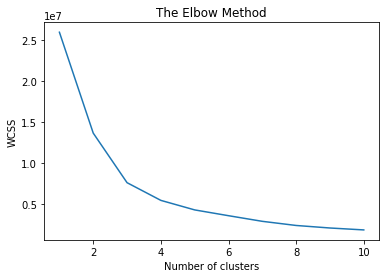

In [22]:
#visualize elbow graph to optimal k number
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    k = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k.fit(x)
    wcss.append(k.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

from Graph we take k = 4 

In [23]:
k = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y = k.fit_predict(x)

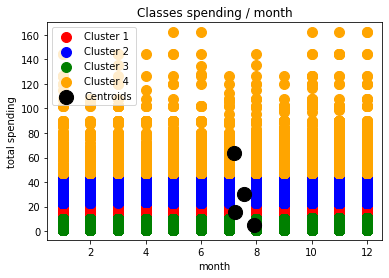

In [24]:
# Visualising the clusters
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Classes spending / month')
plt.xlabel('month')
plt.ylabel('total spending')
plt.legend()
plt.show()

from Graph we notice :
There are 4 clusters of customers based on their contry and spending

 1- spend around 10$ per month

 2- spend from (10 - 20) $ per month 

 3- spend from (20 - 40) $ per month 

 4- spend from (40 - 160) $ per month 


In [ ]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(x, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')